In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [507]:
colors = [
    'dodgerblue', 'mediumseagreen', 'tomato', 'mediumpurple', 'darkorange', 
    'orchid', 'khaki', 'skyblue', 'lightcoral', 'lightgreen', 
    'gold', 'mediumslateblue', 'sandybrown', 'plum', 'cornflowerblue', 
    'lightpink', 'darkcyan', 'peachpuff', 'darkkhaki', 'lightsalmon'
]

In [508]:
df=pd.read_csv(r"C:\Users\Basel\Desktop\Data Analysis Projects\Product Recommendation System\OnlineRetail.csv", encoding= 'unicode_escape')

In [509]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [510]:
df.rename(columns={"Description":"ItemName"},inplace=True)

In [511]:
df.dtypes

InvoiceNo       object
StockCode       object
ItemName        object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [513]:
df['InvoiceNo']=df['InvoiceNo'].str.replace(r'[A-Za-z]','',regex=True)

In [514]:
df['InvoiceNo']=df['InvoiceNo'].astype('int64')

In [540]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
ItemName       0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [516]:
df.dropna(inplace=True)

In [517]:
df['CustomerID']=df['CustomerID'].astype('int64')

In [518]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [519]:
df.dtypes

InvoiceNo               int64
StockCode              object
ItemName               object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [520]:
df['Quantity'][df['Quantity']<0]=abs(df['Quantity'][df['Quantity']<0])

C:\Users\Basel\AppData\Local\Temp\ipykernel_18264\921208746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'][df['Quantity']<0]=abs(df['Quantity'][df['Quantity']<0])


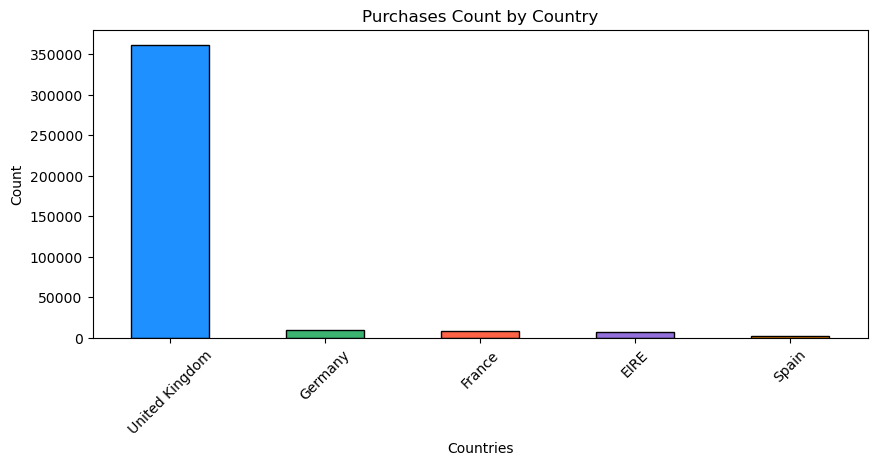

In [548]:
CountryCount=df['Country'].value_counts(sort=True)[:5]
CountryCount.plot(kind='bar',ylabel='Count',xlabel='Countries',figsize=(10,4),color=colors,title='Purchases Count by Country',edgecolor='Black')
plt.xticks(rotation=45)
plt.show()

In [522]:
df.columns

Index(['InvoiceNo', 'StockCode', 'ItemName', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [523]:
df['TotalPrice']=df['UnitPrice']*df['Quantity']

In [524]:
df['TotalPrice'].sum()

9522749.994000003

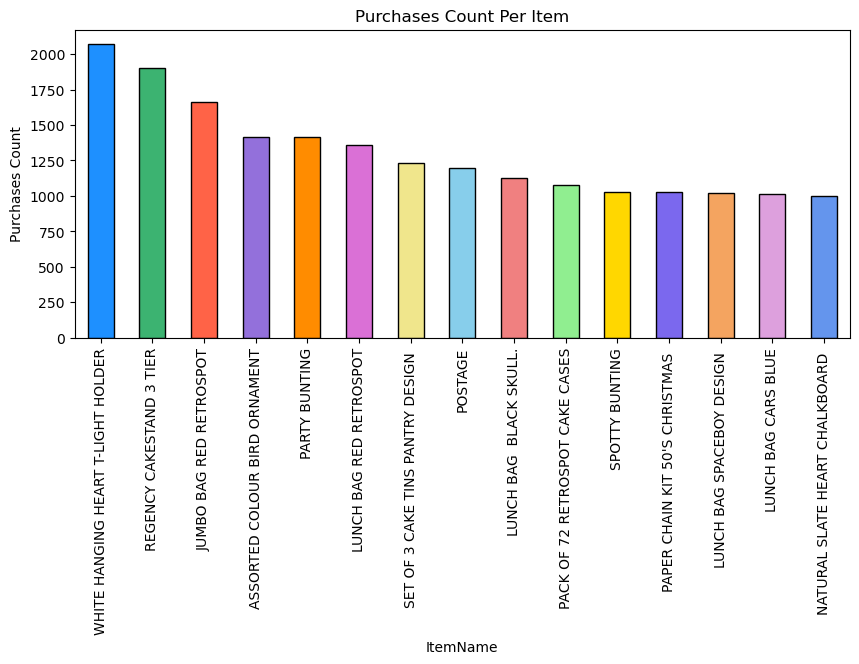

In [546]:
ItemCount=df['ItemName'].value_counts(sort=True)[:15]
ItemCount.plot(kind='bar',figsize=(10,4),color=colors,ylabel='Purchases Count',title='Purchases Count Per Item',edgecolor='Black')
plt.show()

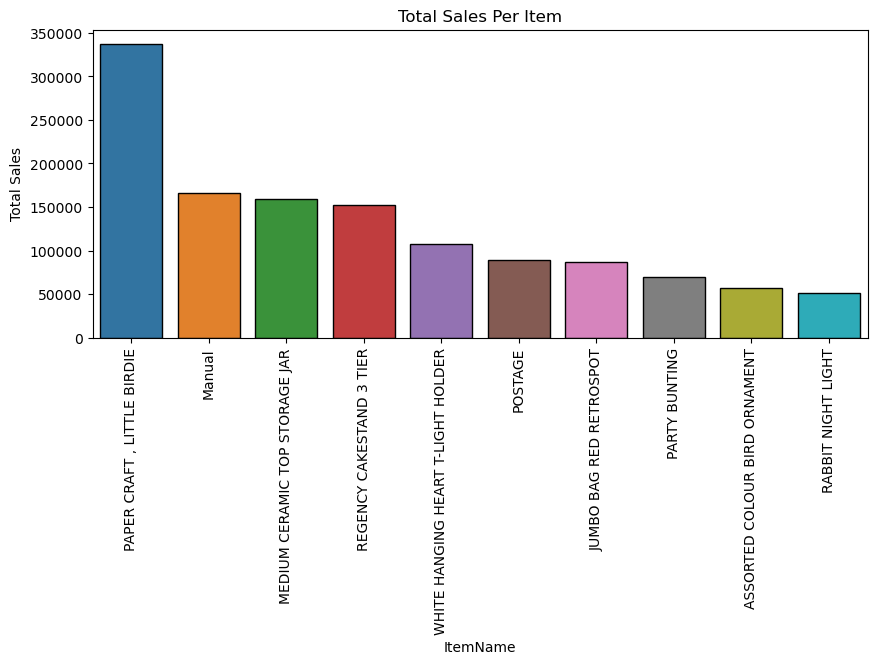

In [552]:
ItemTotalPrice=df.groupby('ItemName')[['TotalPrice']].sum().sort_values(by=['TotalPrice'],ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x=ItemTotalPrice.index,y=ItemTotalPrice['TotalPrice'].values,edgecolor='Black')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.title('Total Sales Per Item')
plt.show()

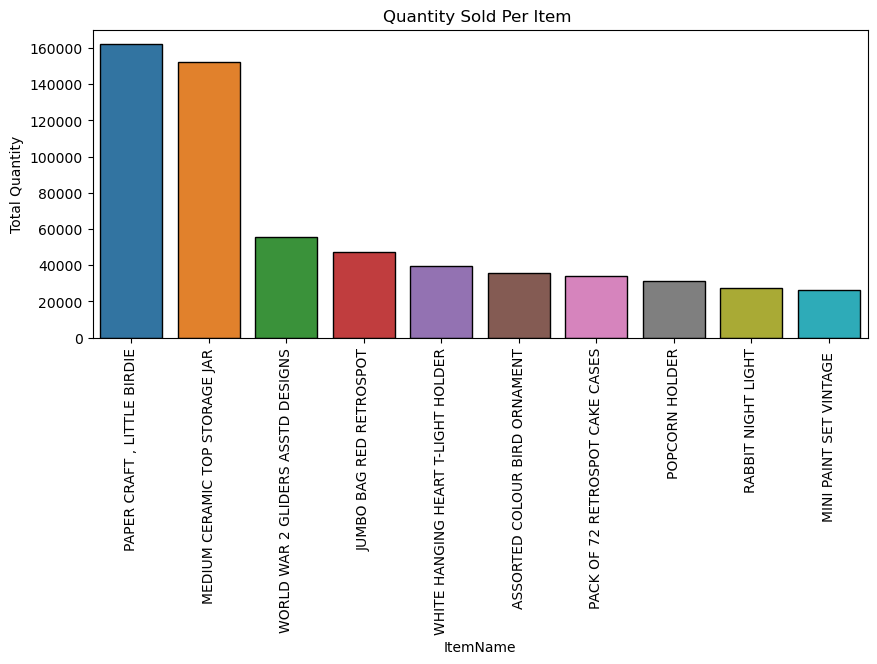

In [553]:
ItemTotalQuantity=df.groupby('ItemName')[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x=ItemTotalQuantity.index,y=ItemTotalQuantity['Quantity'].values,edgecolor='Black')
plt.xticks(rotation=90)
plt.ylabel('Total Quantity')
plt.title('Quantity Sold Per Item ')
plt.show()

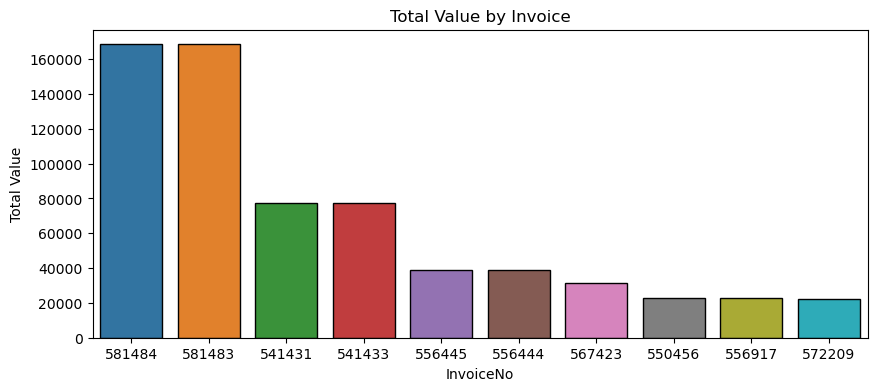

In [558]:
InvoiceTotalPrice=df.groupby('InvoiceNo')[['TotalPrice']].sum().sort_values(by='TotalPrice',ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x=InvoiceTotalPrice.index,y=InvoiceTotalPrice['TotalPrice'].values,order=InvoiceTotalPrice.index,edgecolor='Black')
plt.ylabel('Total Value')
plt.title('Total Value by Invoice')
plt.show()

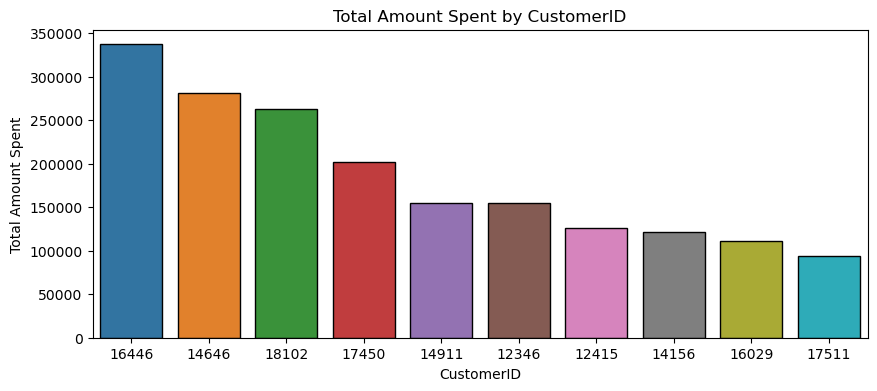

In [562]:
CustomerTotalPrice=df.groupby('CustomerID')[['TotalPrice']].sum().sort_values(by='TotalPrice',ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x=CustomerTotalPrice.index,y=CustomerTotalPrice['TotalPrice'].values,order=CustomerTotalPrice.index,edgecolor='Black')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by CustomerID')
plt.show()

In [533]:
df_baskets = df[['InvoiceNo','StockCode','ItemName','Quantity']]

In [534]:
df_baskets['ItemName']=df_baskets['ItemName'].str.strip()

C:\Users\Basel\AppData\Local\Temp\ipykernel_18264\1565284837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baskets['ItemName']=df_baskets['ItemName'].str.strip()


In [535]:
df_items=df_baskets.pivot_table(index='InvoiceNo',columns='ItemName',values='Quantity').fillna(0)

In [569]:
df_items

ItemName,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0


In [536]:
def get_recommendations(df,Item):
    correlation=df.corrwith(df[Item])
    df=pd.DataFrame(data=correlation,columns=['Correlation'])
    df=df.sort_values(by='Correlation',ascending=False)[1:6]
    return df

In [537]:
df[['ItemName']].value_counts(sort=True)

ItemName                          
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
BLUE NEW BAROQUE FLOCK CANDLESTICK       1
IVORY SHELL HEART EARRINGS               1
BLUE PAINTED KASHMIRI CHAIR              1
IVORY PANTRY HANGING LAMP                1
MINT DINER CLOCK                         1
Name: count, Length: 3896, dtype: int64

In [749]:
df_recommendations=get_recommendations(df_items,"JUMBO BAG RED RETROSPOT")

In [750]:
df_recommendations

,Correlation
ItemName,
JUMBO BAG STRAWBERRY,0.683301
JUMBO BAG PINK POLKADOT,0.609921
JUMBO BAG SPACEBOY DESIGN,0.458764
JUMBO BAG TOYS,0.430559
JUMBO BAG PINK VINTAGE PAISLEY,0.427556


<Axes: ylabel='ItemName'>

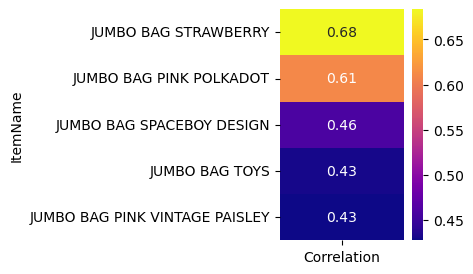

In [760]:
plt.figure(figsize=(2,3))
sns.heatmap(data=df_recommendations,annot=True,cmap='plasma')

In [576]:
df['InvoiceDate']=df['InvoiceDate'].dt.date

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

Text(0.5, 1.0, 'Sales Time Series')

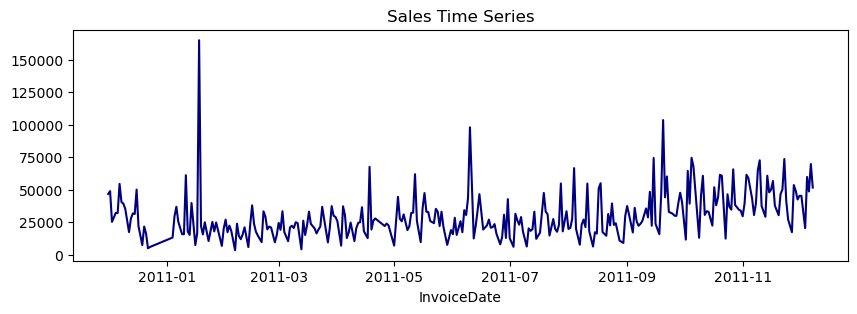

In [589]:
plt.figure(figsize=(10,3))
Total_Sales=df.groupby('InvoiceDate')[['TotalPrice']].sum().sort_values(by='InvoiceDate')[:-1]
sns.lineplot(x=Total_Sales.index,y=Total_Sales['TotalPrice'].values,color='navy')
plt.title('Sales Time Series')

In [570]:
from statsmodels.tsa.stattools import adfuller
from time import time
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm

In [592]:
decomposition=seasonal_decompose(Total_Sales,model='additive',period=7)

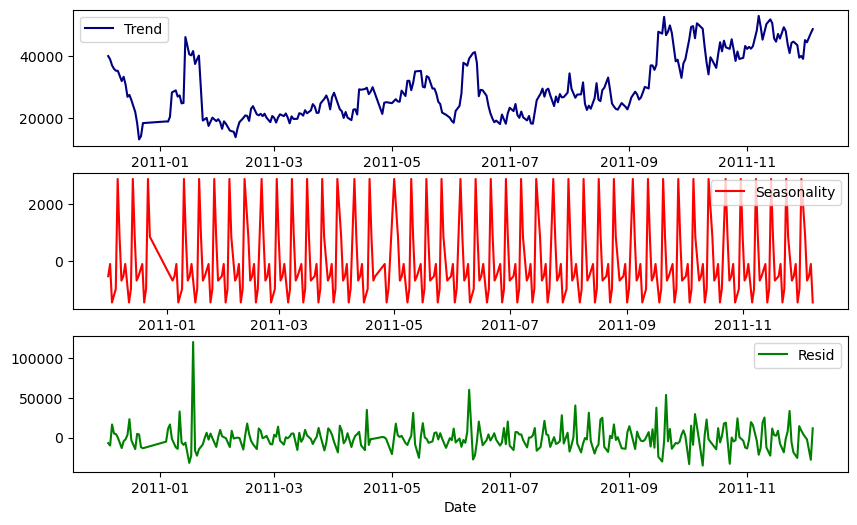

In [627]:
fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(10,6))
axs[0].plot(decomposition.trend,color='navy',label='Trend')
axs[0].legend()
axs[1].plot(decomposition.seasonal,color='red',label='Seasonality')
axs[1].legend()
axs[2].plot(decomposition.resid,color='green',label='Resid')
axs[2].legend()
plt.xlabel('Date')
plt.show()